In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Parameters:

In [4]:
# UK: unstable / polarized
params_UK = {
    'beta': 0.30,
    'sigma': 0.40,
    'theta': 0.75,
    'alpha': 0.02,
    'delta': 0.10,
    'mu': 0.02,
    'psi': 0.15
}

# Finland: stable / high-trust
params_FIN = {
    'beta': 0.20,
    'sigma': 0.30,
    'theta': 0.20,
    'alpha': 0.10,
    'delta': 0.06,
    'mu': 0.08,
    'psi': 0.01
}

In [5]:
# ============================================================
# MODEL RHS (corrected, mass-conserving)
# ============================================================

def f(t, S, E, T, D, p):
    dS = -(p['beta'] + p['alpha']) * S \
         + p['delta'] * T \
         + p['mu'] * D \
         - p['psi'] * D * S          # <-- FIXED

    dE = p['beta'] * S \
         + p['psi'] * D * S \
         - p['sigma'] * E

    dT = (1 - p['theta']) * p['sigma'] * E \
         + p['alpha'] * S \
         - p['delta'] * T

    dD = p['theta'] * p['sigma'] * E \
         - p['mu'] * D

    return np.array([dS, dE, dT, dD])


### RUNGE–KUTTA 4 METHOD


In [6]:
def rk4_system(f, y0, t0, T, N, params):
    h = (T - t0) / N
    t = np.linspace(t0, T, N + 1)
    y = np.zeros((N + 1, len(y0)))
    y[0] = y0

    for n in range(N):
        k1 = f(t[n], *y[n], params)
        k2 = f(t[n] + h/2, *(y[n] + h/2 * k1), params)
        k3 = f(t[n] + h/2, *(y[n] + h/2 * k2), params)
        k4 = f(t[n] + h, *(y[n] + h * k3), params)

        y[n + 1] = y[n] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, y



### INITIAL CONDITIONS (normalized)



In [ ]:
y0_UK = np.array([0.1441, 0.0050, 0.1901, 0.6560])
y0_FIN = np.array([0.1349, 0.0006, 0.6091, 0.2549])

y0_UK = y0_UK / np.sum(y0_UK)
y0_FIN = y0_FIN / np.sum(y0_FIN)

### SOLVE IVPs


In [ ]:
# ============================================================
# ============================================================

t0 = 0
Tmax = 40
N = 2000

t_UK, y_UK = rk4_system(f, y0_UK, t0, Tmax, N, params_UK)
t_FIN, y_FIN = rk4_system(f, y0_FIN, t0, Tmax, N, params_FIN)



### PLOTS: TIME SERIES


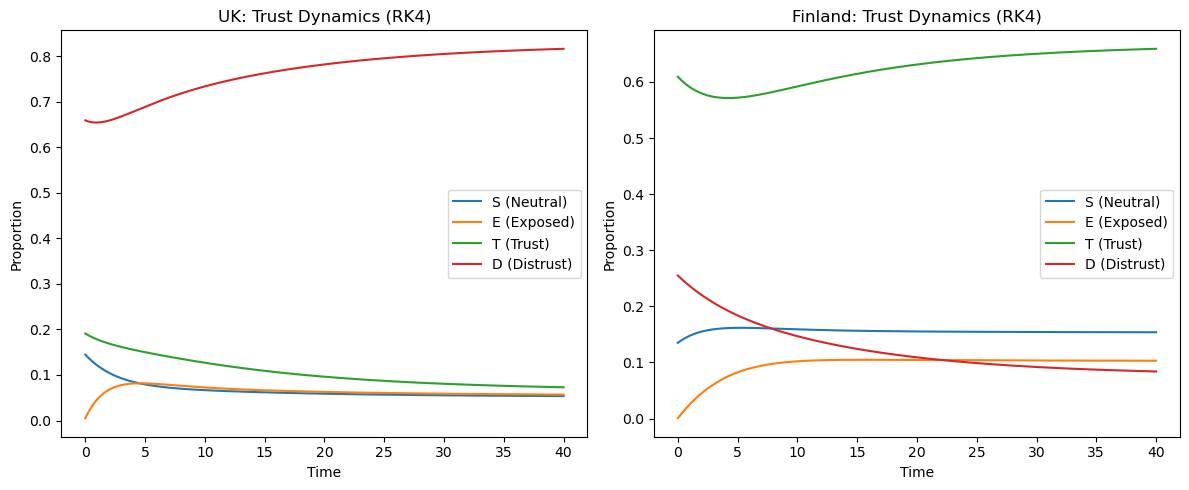

In [7]:


labels = ['S (Neutral)', 'E (Exposed)', 'T (Trust)', 'D (Distrust)']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for i in range(4):
    plt.plot(t_UK, y_UK[:, i], label=labels[i])
plt.title("UK: Trust Dynamics (RK4)")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.legend()

plt.subplot(1,2,2)
for i in range(4):
    plt.plot(t_FIN, y_FIN[:, i], label=labels[i])
plt.title("Finland: Trust Dynamics (RK4)")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.legend()

plt.tight_layout()
plt.show()